In [1]:
import pandas as pd
import numpy as np
import json
import pyarabic.araby as araby
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

load the text data from the json file

In [2]:
lines = open('../input/arb-egy-cmp-corpus/ar_arz_wiki_corpus.json').readlines()
wiki_df = pd.DataFrame([json.loads(line) for line in lines])

In [3]:
wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18863 entries, 0 to 18862
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      18863 non-null  object
 1   filename  18863 non-null  object
 2   label     18863 non-null  object
dtypes: object(3)
memory usage: 442.2+ KB


Check the data balance for the data according to it's classes

<AxesSubplot:>

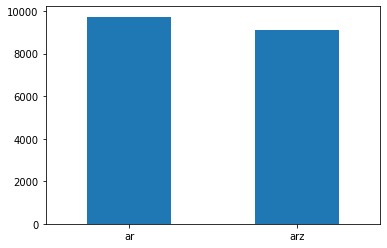

In [4]:
wiki_df['label'].value_counts().plot(kind='bar', rot=0)

In [8]:
labels_encode = {'ar': 0, 'arz': 1}

def encode_label(label):
    return labels_encode[label]
# End Func

def decode_label(code):
    return [k for k, v in labels_encode.items() if v == code][0]
# End Func

def cleanArabicText(sentence):
    st = ISRIStemmer()
    words = word_tokenize(sentence)
    stopwords_list = stopwords.words('arabic')
    words = [st.stem(araby.strip_diacritics(w)) for w in words if araby.strip_diacritics(w) not in stopwords_list]
    return ' '.join(words)
# End of Func

Prepare the data for transformation step

In [9]:
wiki_df['text_cleaned'] = wiki_df['text'].apply(cleanArabicText)

Load the data for modeling phase

In [10]:
X = wiki_df['text_cleaned'].values
y = wiki_df['label'].apply(encode_label).values

Transform the text data using TFIDF

In [11]:
tfidf_vec = TfidfVectorizer()
X_vals = tfidf_vec.fit_transform(X)

Split the data to train and test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_vals, y, test_size=0.33, random_state=42)

### Using Naive Bayes

In [13]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
nb_y_predict = clf_nb.predict(X_test)

Accuracy: 0.9114859437751004


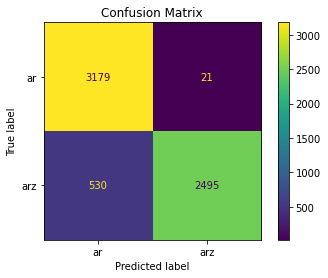

Classification Report: 
              precision    recall  f1-score   support

          ar       0.99      0.86      0.92      3709
         arz       0.82      0.99      0.90      2516

    accuracy                           0.91      6225
   macro avg       0.91      0.92      0.91      6225
weighted avg       0.93      0.91      0.91      6225



In [14]:
print(f'Accuracy: {accuracy_score(nb_y_predict, y_test)}')
plot_confusion_matrix(clf_nb, X_test, y_test, display_labels=labels_encode.keys(), values_format='d')
plt.title('Confusion Matrix')
plt.show()
print(f'Classification Report: \n{classification_report(nb_y_predict, y_test, target_names=labels_encode.keys())}')

### Using SVM

In [15]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
svm_y_predict = clf_svm.predict(X_test)

Accuracy: 0.9648192771084337


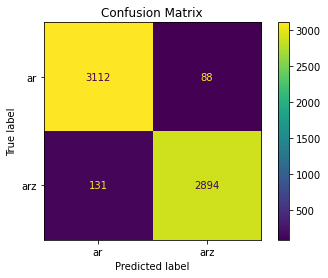

Classification Report: 
              precision    recall  f1-score   support

          ar       0.97      0.96      0.97      3243
         arz       0.96      0.97      0.96      2982

    accuracy                           0.96      6225
   macro avg       0.96      0.97      0.96      6225
weighted avg       0.96      0.96      0.96      6225



In [16]:
print(f'Accuracy: {accuracy_score(svm_y_predict, y_test)}')
plot_confusion_matrix(clf_svm, X_test, y_test, display_labels=labels_encode.keys(), values_format='d')
plt.title('Confusion Matrix')
plt.show()
print(f'Classification Report: \n{classification_report(svm_y_predict, y_test, target_names=labels_encode.keys())}')